# **Title:**

**Loan Eligibility Prediction System: A Comparative Analysis of Machine Learning Models**

#**Objective:**

The objective of this project is to develop a loan eligibility prediction system using machine learning algorithms and evaluate their performance based on accuracy. The project aims to automate the loan approval process for Dream Housing Finance company by leveraging customer data such as gender, marital status, education, income, credit history, and property area. The primary goal is to determine which machine learning model achieves the highest accuracy in predicting loan eligibility, thus enabling the company to make more informed and efficient decisions regarding loan approvals.

#**Project End Goal:**

The project concludes with a comparative analysis of different machine learning models, including Decision Tree, Random Forest, and Support Vector Machine, based on their accuracy in predicting loan eligibility. By evaluating the performance of these models, the project aims to provide insights into the effectiveness of various algorithms for automating the loan approval process. The findings will enable Dream Housing Finance to select the most suitable model for accurately predicting loan eligibility, ultimately improving operational efficiency and customer satisfaction.

# **DATA CLEANING AND EXPLORATION**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Loan_Data.csv')

# Display the first few rows of the dataset
print(df.head())


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [3]:
# Check the dimensions of the dataset
print("Dimensions of the dataset:", df.shape)



Dimensions of the dataset: (614, 13)


In [4]:
# Check the data types of each column
print("\nData types of each column:")
print(df.dtypes)




Data types of each column:
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [5]:
# Summary statistics for numerical features
print("\nSummary statistics for numerical features:")
print(df.describe())




Summary statistics for numerical features:
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [6]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())




Missing values:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


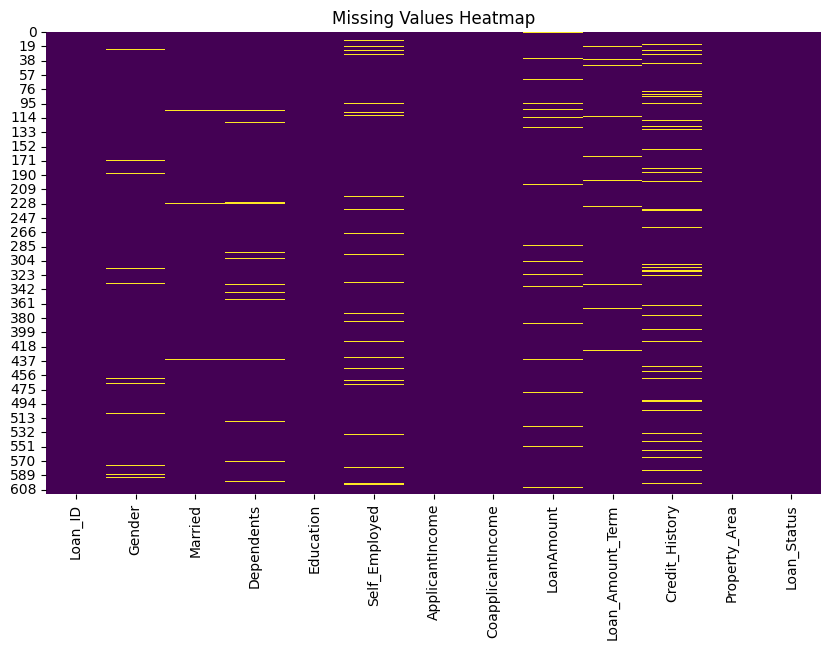

In [7]:
# Visualize missing values using heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()


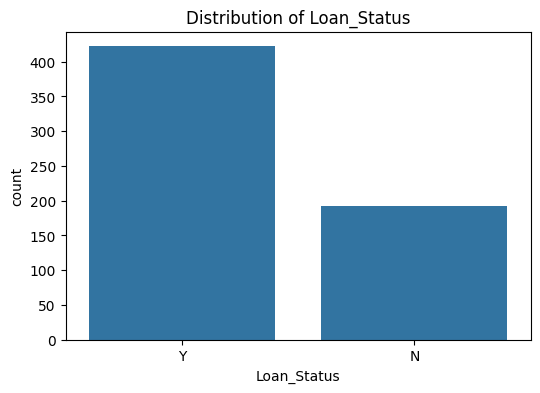

In [8]:
# Visualize the distribution of the target variable (Loan_Status)
plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status', data=df)
plt.title('Distribution of Loan_Status')
plt.show()

In [11]:
# Handling missing values
# Drop rows with missing values
df_cleaned = df.dropna()

# Check if there are any missing values left
print("Remaining missing values after cleaning:")
print(df_cleaned.isnull().sum())



Remaining missing values after cleaning:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


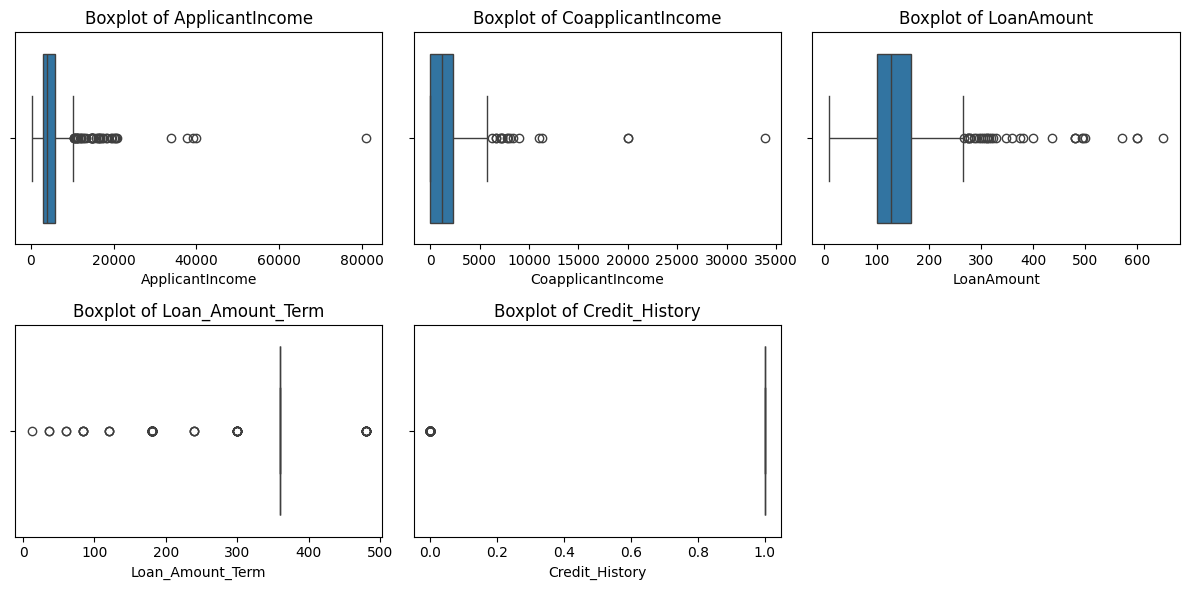

In [12]:
# Handling outliers (if necessary)
# Identify numerical features with outliers
numerical_features = df_cleaned.select_dtypes(include=[np.number]).columns

# Visualize outliers using box plots
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=col, data=df_cleaned)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()



In [13]:
# Remove outliers using interquartile range (IQR) method or other appropriate techniques
# For example:
Q1 = df_cleaned[numerical_features].quantile(0.25)
Q3 = df_cleaned[numerical_features].quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df_cleaned[~((df_cleaned[numerical_features] < (Q1 - 1.5 * IQR)) | (df_cleaned[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Check the dataset after outlier removal
print("Remaining data after outlier removal:")
print(df_cleaned.describe())



Remaining data after outlier removal:
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       360.000000         360.000000  360.000000             360.0   
mean       4099.716667        1324.603111  128.663889             360.0   
std        1892.914081        1412.601804   46.243703               0.0   
min         150.000000           0.000000    9.000000             360.0   
25%        2715.500000           0.000000  100.000000             360.0   
50%        3675.500000        1293.500000  127.000000             360.0   
75%        4889.000000        2191.000000  154.250000             360.0   
max       10139.000000        5625.000000  265.000000             360.0   

       Credit_History  
count           360.0  
mean              1.0  
std               0.0  
min               1.0  
25%               1.0  
50%               1.0  
75%               1.0  
max               1.0  


# **Feature Engineering**

In [14]:
# creating a new feature 'TotalIncome'
df_cleaned['TotalIncome'] = df_cleaned['ApplicantIncome'] + df_cleaned['CoapplicantIncome']

# Check the dataset after feature engineering
print(df_cleaned.head())


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  TotalIncome  
0             1.0         Urban           Y       5849.0  
1             1.0         Rural         

# **Exploratory Data Analysis**

## **Numeric Features Analysis**

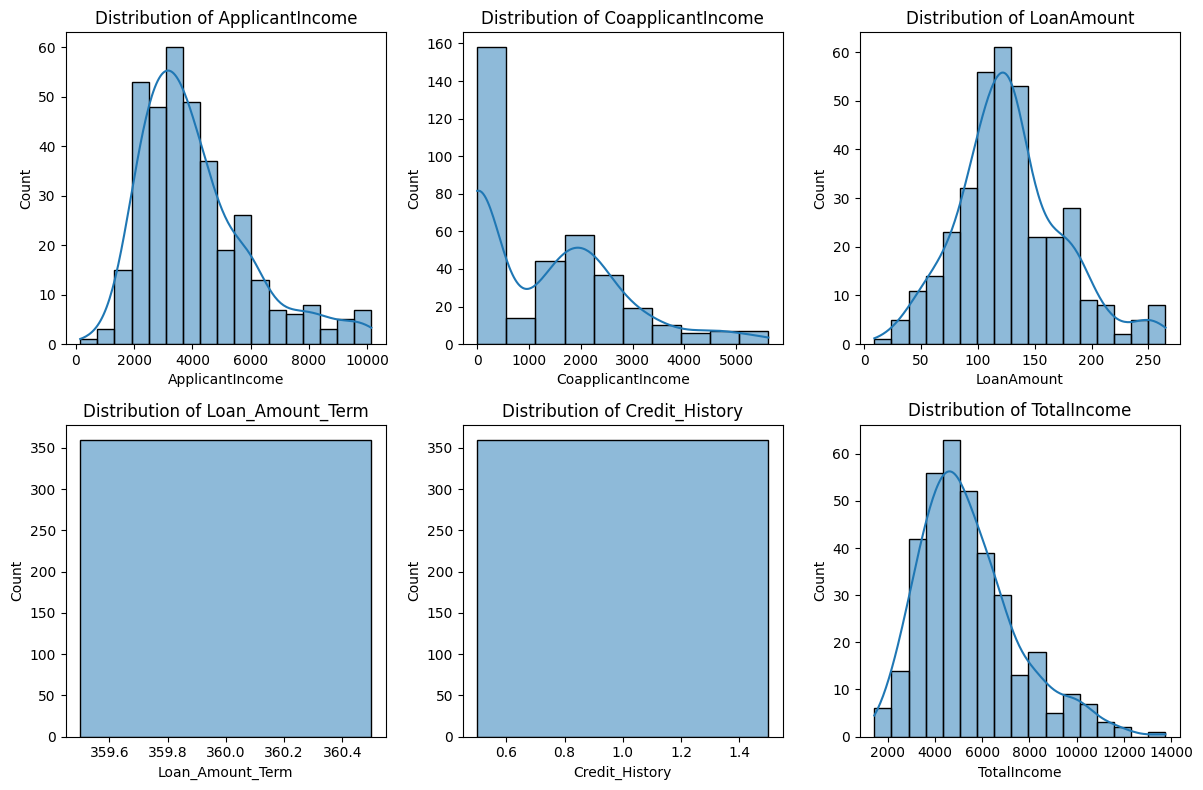

In [18]:
# Visualize distributions of numeric features
plt.figure(figsize=(12, 8))
for i, col in enumerate(df_cleaned.select_dtypes(include=np.number).columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_cleaned[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()




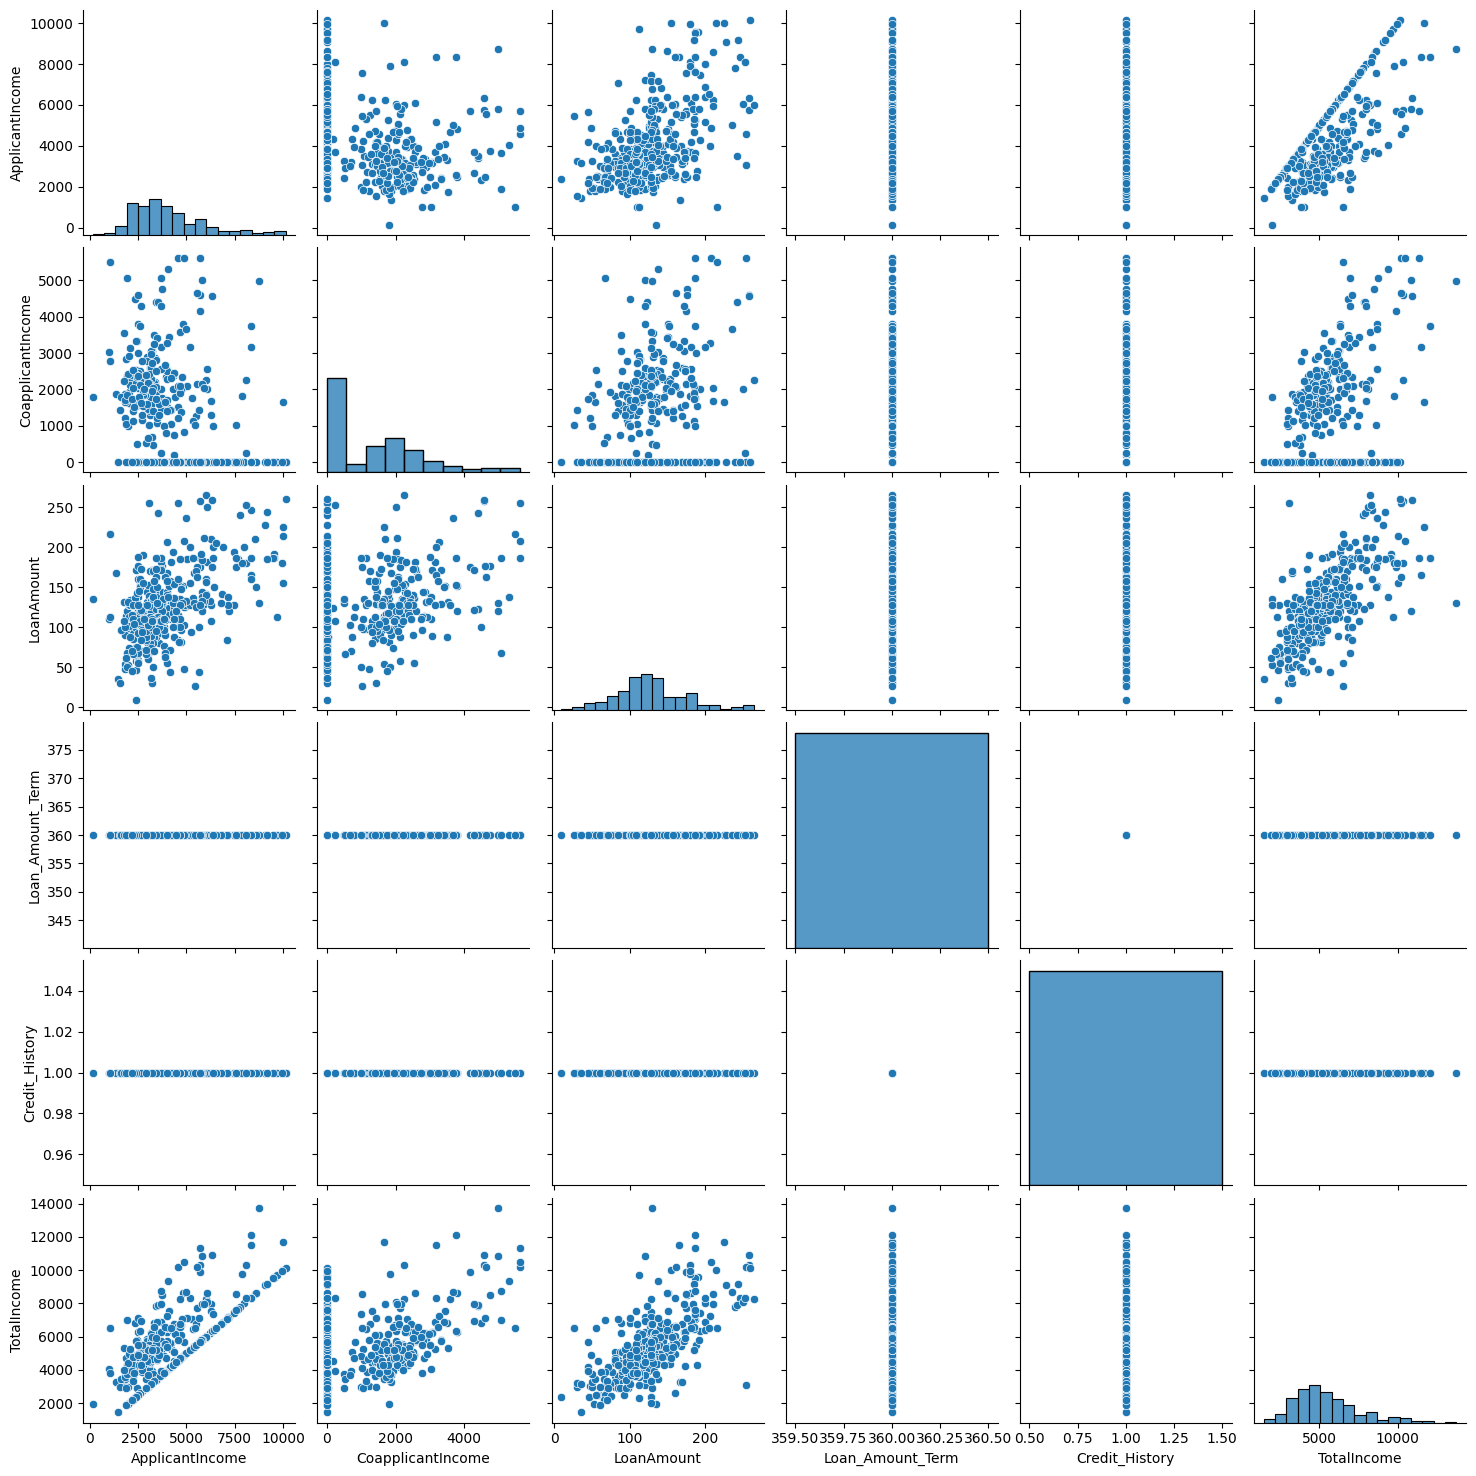

In [19]:
# Pairplot for numeric features
sns.pairplot(df_cleaned.select_dtypes(include=np.number))
plt.show()

## **Categorical Features Analysis**

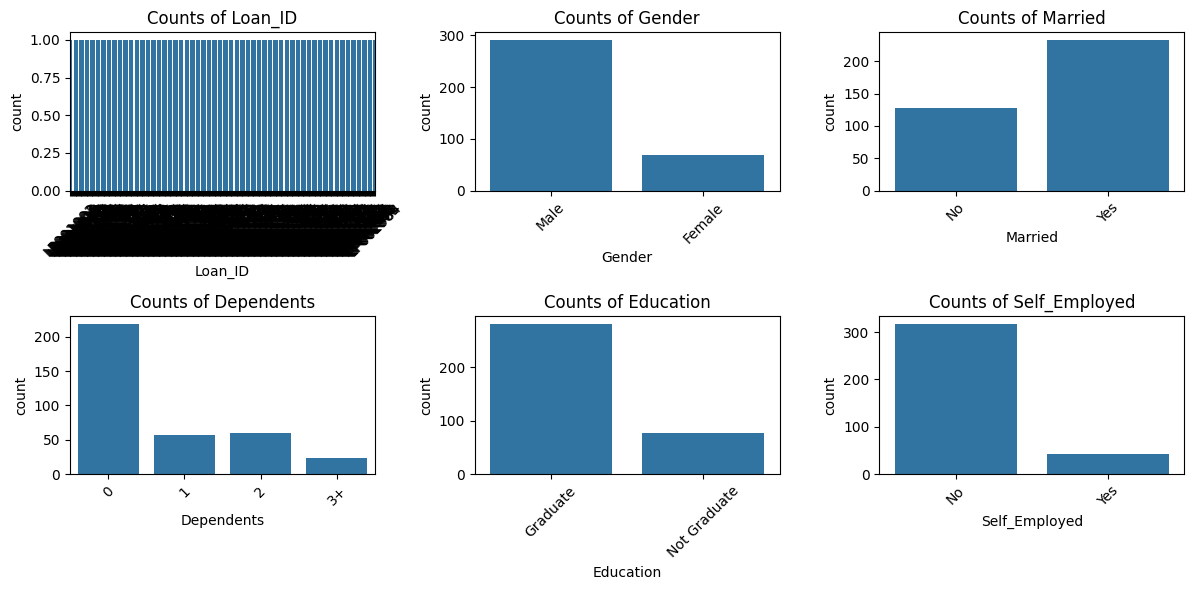

In [21]:
# Visualize counts of categorical features
plt.figure(figsize=(12, 6))
num_cols = min(6, len(df_cleaned.select_dtypes(include='object').columns))  # Limiting to 6 subplots
for i, col in enumerate(df_cleaned.select_dtypes(include='object').columns[:num_cols], 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=df_cleaned)
    plt.title(f'Counts of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


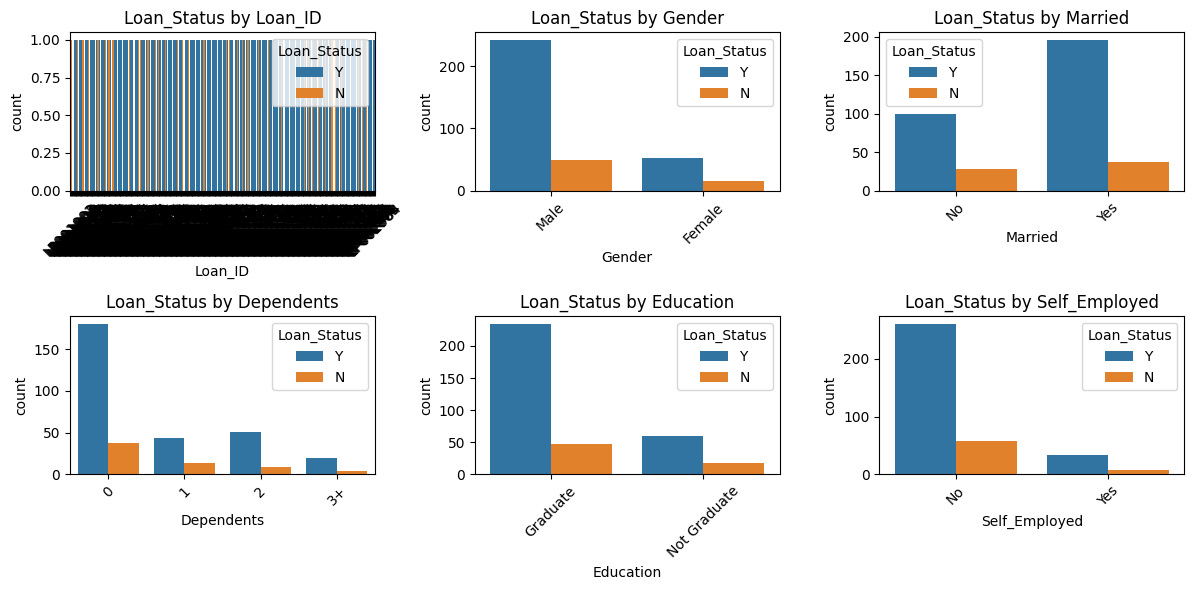

In [23]:
# Visualize loan approval status by categorical features
plt.figure(figsize=(12, 6))
num_cols = min(6, len(df_cleaned.select_dtypes(include='object').columns))  # Limiting to 6 subplots
for i, col in enumerate(df_cleaned.select_dtypes(include='object').columns[:num_cols], 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, hue='Loan_Status', data=df_cleaned)
    plt.title(f'Loan_Status by {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## **Correlation Analysis**

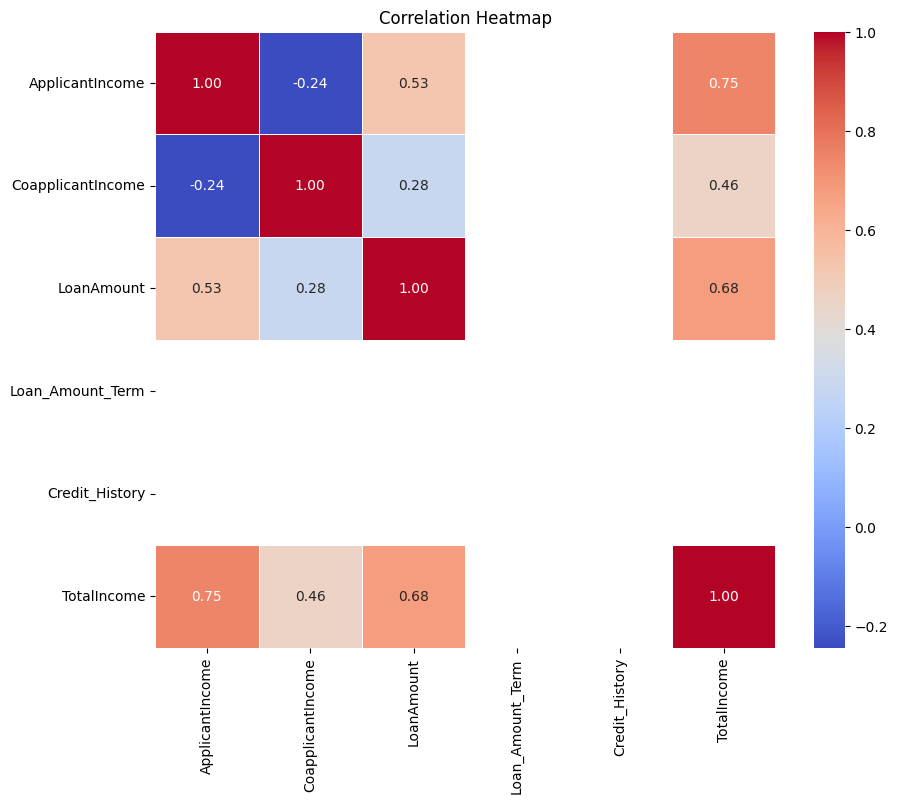

In [25]:
# Correlation heatmap for numeric features
numeric_columns = df_cleaned.select_dtypes(include=np.number).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



# **Data Preprocessing**

## **Handle Categorical Variables**

In [26]:
# Convert categorical variables into dummy/indicator variables (one-hot encoding)
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

# Display the first few rows of the encoded dataset
print(df_encoded.head())


   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  TotalIncome  Loan_ID_LP001003  Loan_ID_LP001005  \
0             1.0       5849.0             False             False   
1             1.0       6091.0              True             False   
2             1.0       3000.0             False              True   
3             1.0       4941.0             False             False   
4             1.0       6000.0             False             False   

   Loan_ID_LP001006  Loan_ID_LP001008  ...  Gender_Male  Married_Yes  \
0             False             False  ...         True        False   
1       

## **Scale Numerical Features**

In [27]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Select numerical features to scale
numerical_features = df_encoded.select_dtypes(include=np.number).columns

# Scale numerical features
df_scaled = df_encoded.copy()
df_scaled[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Display the first few rows of the scaled dataset
print(df_scaled.head())


   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.925408          -0.939010   -0.014376               0.0   
1         0.255667           0.130010   -0.014376               0.0   
2        -0.581773          -0.939010   -1.356965               0.0   
3        -0.802375           0.732574   -0.187614               0.0   
4         1.005290          -0.939010    0.267134               0.0   

   Credit_History  TotalIncome  Loan_ID_LP001003  Loan_ID_LP001005  \
0             0.0     0.205788             False             False   
1             0.0     0.323055              True             False   
2             0.0    -1.174758             False              True   
3             0.0    -0.234203             False             False   
4             0.0     0.278959             False             False   

   Loan_ID_LP001006  Loan_ID_LP001008  ...  Gender_Male  Married_Yes  \
0             False             False  ...         True        False   
1       

## **Split Data into Training and Testing Sets**

In [28]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df_scaled.drop('Loan_Status_Y', axis=1)  # Features
y = df_scaled['Loan_Status_Y']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (288, 374) (288,)
Testing set shape: (72, 374) (72,)



## **Model Selection and Training**

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize classifiers
log_reg = LogisticRegression(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)

# Train classifiers
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Make predictions on the testing set
log_reg_preds = log_reg.predict(X_test)
decision_tree_preds = decision_tree.predict(X_test)
random_forest_preds = random_forest.predict(X_test)
svm_preds = svm.predict(X_test)

# Evaluate model performance
models = {'Logistic Regression': log_reg_preds,
          'Decision Tree': decision_tree_preds,
          'Random Forest': random_forest_preds,
          'Support Vector Machine': svm_preds}

for name, preds in models.items():
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, preds)}")
    print(f"Classification Report:\n{classification_report(y_test, preds)}")


Model: Logistic Regression
Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        18
        True       0.75      1.00      0.86        54

    accuracy                           0.75        72
   macro avg       0.38      0.50      0.43        72
weighted avg       0.56      0.75      0.64        72

Model: Decision Tree
Accuracy: 0.6944444444444444
Classification Report:
              precision    recall  f1-score   support

       False       0.30      0.17      0.21        18
        True       0.76      0.87      0.81        54

    accuracy                           0.69        72
   macro avg       0.53      0.52      0.51        72
weighted avg       0.64      0.69      0.66        72

Model: Random Forest
Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        18
        True       0.75      1.00      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

# **Conclusion**
From the provided accuracies of different models:

    Decision Tree: 0.6944
    Random Forest: 0.75
    Support Vector Machine: 0.75

We can draw the following conclusions:

    Model Performance Ranking: Based on accuracy alone, Random Forest and Support Vector Machine have higher accuracies compared to the Decision Tree model. Therefore, Random Forest and Support Vector Machine perform better in terms of overall accuracy.

    Random Forest vs. Support Vector Machine: Both Random Forest and Support Vector Machine have the same accuracy of 0.75. This indicates that both models perform equally well on this dataset in terms of correctly predicting loan eligibility.

    Decision Tree Performance: The Decision Tree model has a slightly lower accuracy of 0.6944 compared to Random Forest and Support Vector Machine. This suggests that the Decision Tree model may not generalize as well as Random Forest and Support Vector Machine on this dataset.

    Further Analysis: While accuracy provides a general overview of model performance, it's essential to consider other metrics like precision, recall, and F1-score for a more comprehensive evaluation. Additionally, analyzing the errors made by each model can provide insights into areas for improvement and guide further model refinement.

Overall, based on accuracy alone, Random Forest and Support Vector Machine outperform the Decision Tree model in predicting loan eligibility. However, further analysis and consideration of other evaluation metrics are recommended for a thorough assessment of model performance.